In [40]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta 
from dateutil import parser
from math import sqrt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df_boston=pd.read_pickle("df_boston.pkl")

In [5]:
df_boston1=df_boston.drop(["hour","season","count"],axis=1)
correlation=df_boston1.corr()
correlation

,mean_temp,precip,spring,summer,autumn,winter,rushhour,weekday
mean_temp,1.000000,-0.158192,-0.244783,0.527556,0.318683,-0.610597,-0.000085,0.017053
precip,-0.158192,1.000000,0.027688,-0.050325,-0.077897,0.102245,-0.005954,0.010466
spring,-0.244783,0.027688,1.000000,-0.337102,-0.340844,-0.328186,0.003210,-0.009296
summer,0.527556,-0.050325,-0.337102,1.000000,-0.338413,-0.325845,0.000285,0.010511
autumn,0.318683,-0.077897,-0.340844,-0.338413,1.000000,-0.329463,-0.004597,-0.000289
winter,-0.610597,0.102245,-0.328186,-0.325845,-0.329463,1.000000,0.001131,-0.000903
rushhour,-0.000085,-0.005954,0.003210,0.000285,-0.004597,0.001131,1.000000,-0.002728
weekday,0.017053,0.010466,-0.009296,0.010511,-0.000289,-0.000903,-0.002728,1.000000


<AxesSubplot:>

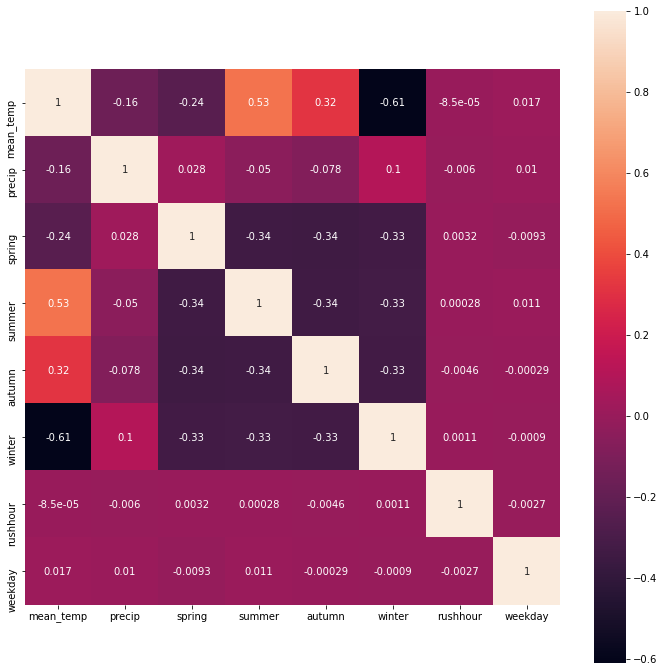

In [6]:
from matplotlib.pyplot import figure
fig=plt.figure(figsize=(12,12))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
#plt.savefig("Heatmap.jpg")

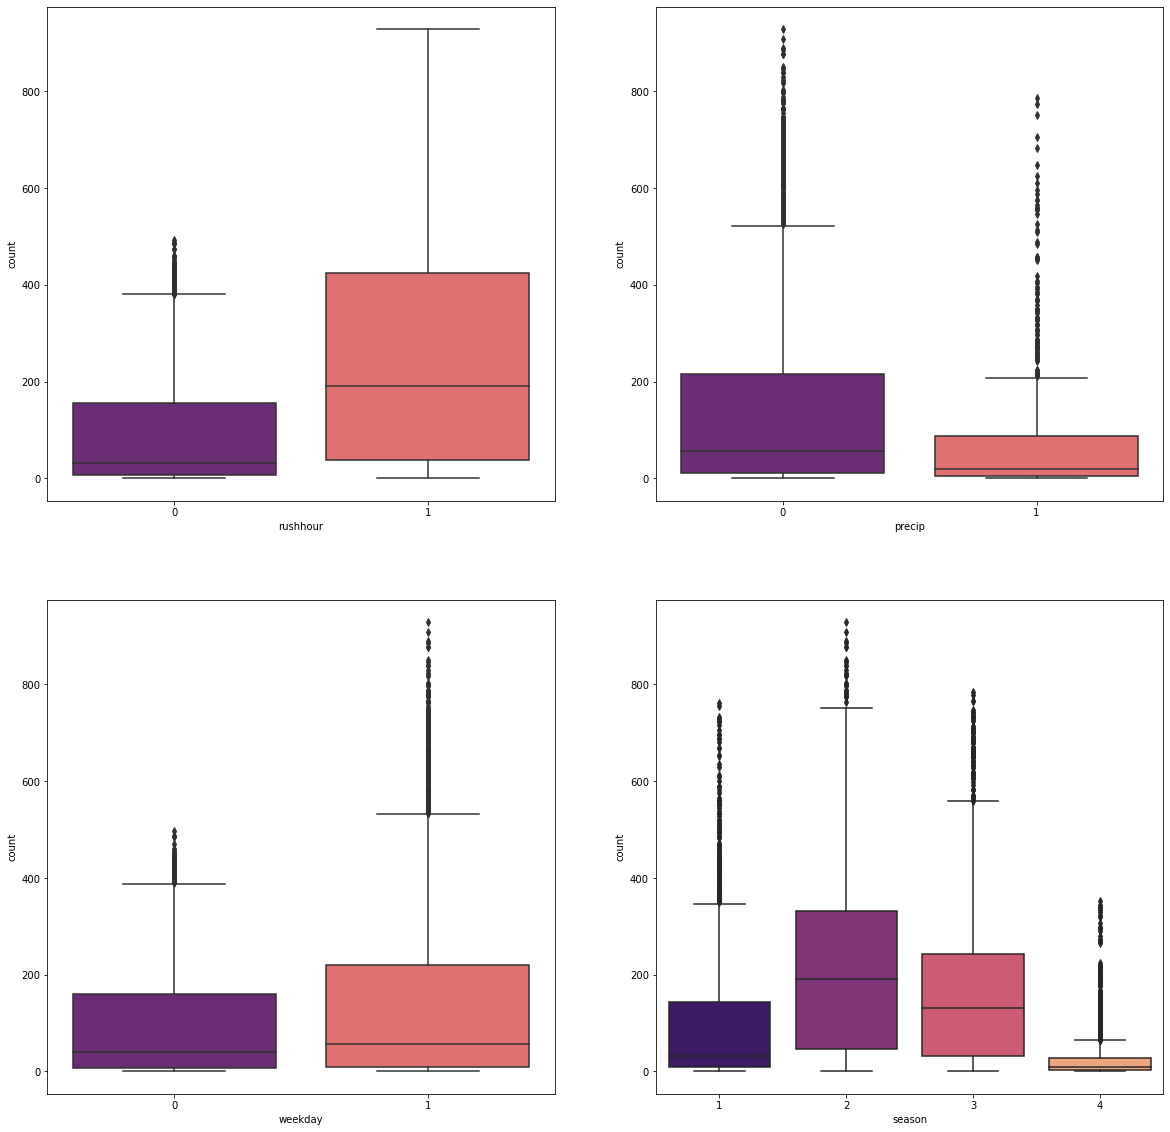

In [9]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.boxplot(x="rushhour",y="count",data=df_boston,palette="magma",ax=axes[0][0])
sns.boxplot(x="precip",y="count",data=df_boston,palette="magma",ax=axes[0][1])
sns.boxplot(x="weekday",y="count",data=df_boston,palette="magma",ax=axes[1][0])
sns.boxplot(x="season",y="count",data=df_boston,palette="magma",ax=axes[1][1])
#plt.savefig("features description.jpg")

# Ridge model 1-Dimensional (mean_temp)

First, we have a look at the ridge model with one feature(mean_temp)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
xp=df_boston["mean_temp"].values
yp=df_boston["count"].values

# initialize model
Poly = PolynomialFeatures(degree = 50)

# fit and transform xp
X_poly = Poly.fit_transform(xp.reshape(-1,1))

In [23]:
from sklearn.linear_model import Ridge

model_L2 = Ridge(alpha = 0.01, normalize = True, solver = 'lsqr') # select least squares regression as solver

model_L2.fit(X_poly, yp)
prediction = model_L2.predict(X_poly)

print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

Coefficients  [ 0.00000000e+00  6.29716770e+00  2.14559697e-01 -1.72107943e-03
 -5.64984784e-05 -3.65655133e-06 -8.33630793e-08 -2.36072584e-09
 -4.06092877e-11 -6.28450362e-13  4.24571295e-15  6.26671421e-16
  3.29281916e-17  1.27873931e-18  4.48737292e-20  1.44834147e-21
  4.44828520e-23  1.30302223e-24  3.67088976e-26  9.92200081e-28
  2.56676124e-29  6.28739165e-31  1.42939008e-32  2.87267423e-34
  4.39102161e-36  9.32506917e-39 -3.16132592e-39 -1.88794986e-40
 -8.14920118e-42 -3.07860751e-43 -1.07789726e-44 -3.58554877e-46
 -1.14767949e-47 -3.56001219e-49 -1.07438060e-50 -3.16044711e-52
 -9.06373168e-54 -2.53042279e-55 -6.85260174e-57 -1.78794280e-58
 -4.43849381e-60 -1.02245042e-61 -2.06040242e-63 -2.96436420e-65
  1.22253317e-67  3.50622449e-68  2.01541378e-69  8.97504605e-71
  3.57520372e-72  1.33656927e-73  4.79390985e-75] 
Intercept  38.41836004058132


In [24]:
# function for plotting

def plot_scikit_output (x, y, fitted_model):
    
    min_x, max_x = x.min(), x.max()
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    
    xt0_poly = Poly.fit_transform(xt0.reshape(-1,1))
    
    # plotting routine
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, fitted_model.predict(xt0_poly), 'C1')
    plt.xlabel("mean_temp")
    plt.ylabel("Demand")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)

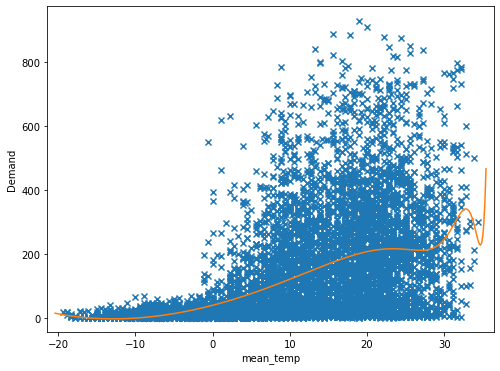

In [25]:
plot_scikit_output (xp, yp, model_L2)

In [29]:
print("Test set performance:")

print("MAE:",mean_absolute_error(prediction, yp))
print("RMSE:",(mean_squared_error(prediction,yp))**(0.5))  

Test set performance:
MAE: 99.44909856237425
RMSE: 142.90675963045598


In [31]:
print(df_boston.columns)

Index(['start_time', 'count', 'mean_temp', 'precip', 'spring', 'summer',
       'autumn', 'winter', 'rushhour', 'weekday', 'season', 'hour'],
      dtype='object')


# Ridge model containing full features

As one feature does not work well, we take all the features into consideration. 

In [33]:
train_y = df_boston["count"]
train = df_boston1.drop(["start_time"],axis=1)
print(train.columns)

# set the training data set and the test data set
train_X, test_X, train_y, test_y = train_test_split(train, train_y, train_size=0.7)

#alpha first set 1.
rd = Ridge(alpha=1)

#train a linear regression model
rd.fit(train_X, train_y)
print(rd.coef_)
print(rd.intercept_)

Index(['mean_temp', 'precip', 'spring', 'summer', 'autumn', 'winter',
       'rushhour', 'weekday'],
      dtype='object')
[  5.03727079 -12.25427649  -6.74398387  38.80733726  10.09217431
 -42.1555277  164.0840006   36.05312875]
8.24667271540892


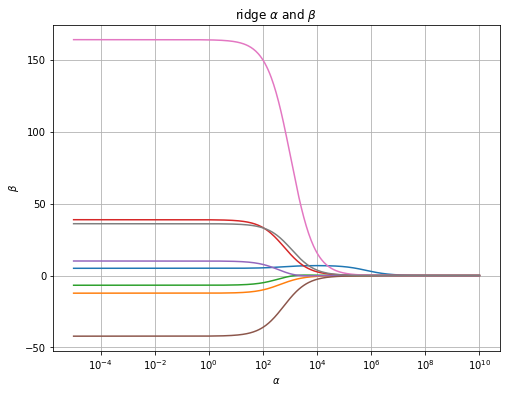

In [34]:
#Set parameters and train the model
alphas = 10**np.linspace(-5, 10, 500)
betas = []
for alpha in alphas:
    rd = Ridge(alpha = alpha)
    rd.fit(train_X, train_y)
    betas.append(rd.coef_)
# make the plot
plt.figure(figsize=(8,6))
plt.plot(alphas, betas)
# Logarithmic transformation of the data is convenient for observation.
plt.xscale('log')

plt.grid(True)
# Coordinate axis adaptation data volume
plt.axis('tight')
plt.title(r'ridge $\alpha$ and $\beta$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [35]:
# to find the most optimal alpha
from sklearn.linear_model import RidgeCV
from sklearn import metrics
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(train_X, train_y)
rd_cv.alpha_

7.7944157504049505

In [36]:
# use the optimal alpha to train the model
rd = Ridge(alpha=rd_cv.alpha_) 
rd.fit(train_X, train_y)
print(rd.coef_)
print(rd.intercept_)

[  5.06259576 -12.06669122  -6.60209461  38.37470484   9.89777405
 -41.67038428 163.0346997   35.83873616]
8.361216647037736


In [37]:
# obtain predictions
result = rd.score(test_X, test_y)
result

0.4300995646947925

In [44]:
y_pred=rd.predict(test_X) 
# The evaluation of the model by the RMSE, MAE, R square score

print('Root Mean Square Error: %.2f'
      %sqrt(mean_squared_error(test_y, y_pred)))
print('Mean absolute Error: %.2f'
      % mean_absolute_error(test_y, y_pred))
    # The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, y_pred))

Root Mean Square Error: 123.19
Mean absolute Error: 93.17
Coefficient of determination: 0.43
